# __Predicting Airbnb Listing Prices in Sydney__

---

## Task 1: Exploratory Data Analysis

Before carrying out initial data analysis methods, `Problem Description` with key points is provided as the firt step using the following headings:
- Forecasting Problem
- Evaluation Criteria
- Types of Variables/Features
- Data summary and main data characteristics
- Missing Values (only explain what you found at this stage)
    


In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from pandas_profiling import ProfileReport
from ipywidgets import interact, Dropdown, FloatSlider
from scipy.stats import zscore

C:\Users\haiho\AppData\Local\Temp\ipykernel_23284\2550282417.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Configure seaborn aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [8]:
df_train = pd.read_csv(r"C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\train.csv")

In [13]:
# Load the Data
#train_path = "C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\train.csv"
#test_path = "C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\test.csv"

df_train = pd.read_csv(r"C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\train.csv", parse_dates=["host_since", "first_review", "last_review"])
df_test = pd.read_csv(r"C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\test.csv", parse_dates=["host_since", "first_review", "last_review"])

In [ ]:
# Display the shape and preview of the train datasets
print(f"Training Data Shape: {df_train.shape}")
display(df_train.head())

Training Data Shape: (7000, 61)


,ID,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,0,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,Heidi,2009-11-20,"Sydney, New South Wales, Australia",I am a Canadian who has made Australia her hom...,within a few hours,100%,69%,t,Balgowlah,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Balgowlah, New South Wales, Australia",Manly,-33.80084,151.26378,Entire residential home,Entire home/apt,6,3 baths,3.0,3.0,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Hair...",2,22,2.0,2.0,22.0,22.0,2.0,22.0,t,0,14,14,174.0,3,1,0,2016-01-02,2021-06-01,4.67,4.33,4.33,4.67,4.33,4.67,4.33,Exempt,f,2,2,0,0,0.04,$470.00
1,1,Unique Designer Rooftop Apartment in City Loca...,Penthouse living at it best ... You will be st...,The location is really central and there is nu...,Morag,2009-12-03,"Sydney, New South Wales, Australia",I am originally Scottish but I have made Sydne...,within an hour,100%,100%,f,Darlinghurst,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Darlinghurst, New South Wales, Australia",Sydney,-33.87964,151.21680,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,5,31,61,336.0,383,18,6,2012-02-23,2021-12-03,4.42,4.58,4.40,4.77,4.67,4.70,4.47,PID-STRA-24061-7,t,1,0,1,0,3.21,$82.00
2,2,"Studio Yindi @ Mosman, Sydney","An open plan apartment, which opens onto a spa...","Mosman is a smart, middle to upper class subur...",John,2010-11-06,"Sydney, New South Wales, Australia",Faber est suae quisquae fortunae\r\n\r\nWe bec...,within a few hours,100%,81%,t,Mosman,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Mosman, New South Wales, Australia",Mosman,-33.81748,151.23484,Entire guest suite,Entire home/apt,4,1 bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,1,9,33,217.0,297,15,4,2010-12-29,2021-11-30,4.55,4.66,4.23,4.87,4.90,4.73,4.68,PID-STRA-6093,f,1,1,0,0,2.23,$150.00
3,3,"2br Eclectic Stylish Home, 2 mins to Bondi Beach","Two blocks to the beach, surf and coffee. Larg...",3 minutes to the beach and cafes. 5 minutes t...,Eilish,2010-11-25,"Bondi Beach, New South Wales, Australia","I'm a designer. I have lived in many cities, c...",within a day,100%,100%,t,Bondi Beach,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Bondi Beach, New South Wales, Australia",Waverley,-33.88905,151.27653,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",90,90,90.0,90.0,90.0,90.0,90.0,90.0,t,12,42,72,347.0,33,1,0,2011-04-09,2021-04-07,4.42,4.42,3.74,4.90,4.90,4.90,4.32,NaN,f,1,1,0,0,0.25,$245.00
4,4,A little bit of Sydney - Australia,"Hello Everyone,<br /><br />We have a quiet are...",NaN,Bryan,2011-01-03,"Sydney, New South Wales, Australia",We are living in Sydney. We like

In [16]:
# Display the shape and preview of the test datasets
print(f"Test Data Shape: {df_test.shape}")
display(df_test.head())

Test Data Shape: (3000, 60)


,ID,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7000,Sweet dream come true*,Nordic style warm colour light to make you rel...,Located at Ryde near Meadowbank.13 mins for wa...,Vanessa,2016-07-05,"Ryde, New South Wales, Australia",NaN,NaN,NaN,NaN,t,NaN,1.0,"['phone', 'jumio', 'offline_government_id', 's...",t,t,"Ryde, New South Wales, Australia",Ryde,-33.81917,151.09689,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Long term stays allowed"", ""Heat...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,30,0,0,2019-08-01,2019-12-10,4.87,4.87,4.73,4.97,4.93,4.80,4.93,NaN,t,1,0,1,0,1.05
1,7001,Huge self contained studio,It is a huge studio. Self contained which <br ...,NaN,J,2016-11-24,AU,NaN,NaN,NaN,NaN,f,NaN,1.0,['phone'],t,f,NaN,The Hills Shire,-33.74884,151.03992,Entire guest suite,Entire home/apt,2,1 bath,1.0,2.0,"[""Free street parking"", ""TV"", ""Hot water"", ""Lo...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,1,0,0,2017-12-18,2017-12-18,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02
2,7002,2 Bedroom Tranquility/Luxury 3xSecure Car Par...,On the Border of Wolli Creek<br />Luxury along...,Our neighbors are great and very sociable peo...,Ozbay,2018-12-26,AU,NaN,NaN,NaN,NaN,f,NaN,1.0,"['phone', 'jumio', 'offline_government_id', 's...",t,t,"Arncliffe, New South Wales, Australia",Rockdale,-33.93715,151.15122,Entire residential home,Entire home/apt,4,1 bath,2.0,2.0,"[""Hot water"", ""Long term stays allowed"", ""Heat...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,11,0,0,2019-12-18,2020-10-01,4.86,5.00,5.00,5.00,5.00,4.86,5.00,NaN,f,1,1,0,0,0.46
3,7003,Massive bright beachside room (entire top floor),Beautiful bright very large room on top floor ...,NaN,Hannah,2017-09-28,Australia,NaN,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Manly,-33.79951,151.27404,Private room in residential home,Private room,4,1 bath,1.0,2.0,"[""Washer"", ""Long term stays allowed"", ""Smoke a...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,5,0,0,2018-01-01,2018-04-13,4.60,4.40,4.20,4.40,4.60,5.00,4.60,NaN,f,1,0,1,0,0.10
4,7004,Quiet place in the heart of Newtown.,"My place is close to RPA Hospital, Sydney Univ...",NaN,Dora,2016-05-09,"New South Wales, Australia",NaN,NaN,NaN,NaN,f,Newtown/Enmore,1.0,"['email', 'phone', 'reviews']",t,f,NaN,Sydney,-33.89292,151.18016,Private room in rental unit,Private room,1,1 shared bath,1.0,NaN,"[""Hot water"", ""Coffee maker"", ""Long term stays...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,3,0,0,2016-07-25,2017-02-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05


In [17]:
# Combine 2 datasets
df = pd.concat([df_train, df_test], keys=['train', 'test'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, ('train', 0) to ('test', 2999)
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ID                                            10000 non-null  int64         
 1   name                                          9998 non-null   object        
 2   description                                   9846 non-null   object        
 3   neighborhood_overview                         6943 non-null   object        
 4   host_name                                     10000 non-null  object        
 5   host_since                                    10000 non-null  datetime64[ns]
 6   host_location                                 9996 non-null   object        
 7   host_about                                    6110 non-null   object        
 8   host_response_time                            

We have 7000 and 3000 records for the training and test datasets respestively which are allocated for 59 information fields and 1 target feature as ``price`. One thing to note is that there exists few features that string-based but should ideally be integer or floating point values.

### Forcasting Problem

When it comes to determining the rental price of each Airbnb, both the host and the customer bear significant and difficult responsibilities. For the host, it is possible for them to set a reasonable price without sacrificing the amount of profit they can earn. Besides, it is essential for the customers to understand the significant factors influencing the price, and look for places that provide comparable prices. The objective of this project is to forecast Airbnb listing prices in Sydney based on the listed properties characteristics. In order to predict rental price, several machine learning models including linear regression, random forest and other models will be adopted with the availability of Scikit-learn module library in Python.

### Evaluation Criteria

In fact, this problem relates to the supervised regression problem, thus, in this case, mean squared error (MSE), R-squared (R^2) and cross-validation score are employed as the selection criteria in order to compare the performance of all the models. Specifically, the model with the smallest mean squared error will be applied on the test dataset to predict the corresponding prices.

### Types of Variables/Features

The data set contains both numeric and object variables. The numeric variables (including both integer and floating point values) refer to the number of rooms, the price and other measurable features of the rental house. On the contrary, object features are typically represented for the description in details, customer feedback and further information of both host and customers.

In [19]:
# Check types of variables/features
col_dtype_dict = {
    dtype: df.select_dtypes(dtype).columns
    for dtype in ["int", "float", "object"]
}

In [20]:
# Print details of all features types
print(col_dtype_dict)

{'int': Index(['ID', 'accommodates', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object'), 'float': Index(['host_listings_count', 'latitude', 'longitude', 'bedrooms', 'beds',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object'), 'object': Index(['

### Data summary

The following output shows a brief statistical description of several numeric variables, specifically 33 out of 60.

In [ ]:
# Perform statistical description on numerical features
df_train.describe()

,ID,host_since,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7000.000000,7000,7000.000000,7000.000000,7000.000000,7000.000000,6340.000000,6760.000000,7000.000000,7000.000000,6955.000000,7000.000000,7000.000000,6.955000e+03,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,6953.000000,7000.000000,7000.000000,7000.000000,6886,6886,6886.000000,6790.000000,6792.000000,6791.000000,6792.000000,6790.000000,6789.000000,7000.000000,7000.000000,7000.000000,7000.000000,6886.000000
mean,3499.500000,2016-03-25 21:52:02.742856960,13.315571,-33.848580,151.191887,3.757714,1.811830,2.243343,29.734571,773.551000,28.485981,30.343857,866.717143,3.088569e+06,29.434657,2.830644e+06,9.276286,24.313286,41.979429,167.068172,35.402429,6.957286,0.750714,2018-09-30 21:10:11.675864064,2020-11-22 04:24:32.204472832,4.631587,4.754588,4.658408,4.841571,4.841826,4.842272,4.643322,10.757143,8.696714,1.939714,0.044571,0.965577
min,0.000000,2009-08-27 00:00:00,0.000000,-34.090180,150.630490,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010-12-29 00:00:00,2013-05-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1749.750000,2014-05-19 18:00:00,1.000000,-33.894395,151.159120,2.000000,1.000000,1.000000,2.000000,200.000000,2.000000,2.000000,365.000000,9.990000e+02,2.000000,6.000000e+02,0.000000,2.000000,7.000000,40.000000,3.000000,0.000000,0.000000,2017-04-08 06:00:00,2020-02-28 00:00:00,4.590000,4.710000,4.560000,4.840000,4.840000,4.810000,4.540000,1.000000,1.000000,0.000000,0.000000,0.150000
50%,3499.500000,2016-01-06 00:00:00,2.000000,-33.875625,151.212020,3.000000,1.000000,2.000000,3.000000,1125.000000,3.000000,5.000000,1125.000000,1.125000e+03,3.800000,1.125000e+03,5.000000,21.000000,43.000000,144.000000,12.000000,2.000000,0.000000,2019-01-21 12:00:00,2021-06-14 00:00:00,4.830000,4.890000,4.820000,4.960000,4.970000,4.940000,4.750000,2.000000,1.000000,0.000000,0.000000,0.520000
75%,5249.250000,2018-01-24 00:00:00,6.000000,-33.801885,151.261272,5.000000,2.000000,3.000000,90.000000,1125.000000,90.000000,90.000000,1125.000000,1.125000e+03,90.000000,1.125000e+03,17.000000,43.000000,71.000000,310.000000,41.000000,9.000000,1.000000,2020-03-21 00:00:00,2021-11-20 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000,6.000000,4.000000,1.000000,0.000000,1.360000
max,6999.000000,2021-11-29 00:00:00,354.000000,-33.392670,151.340410,16.000000,11.000000,22.000000,400.000000,1162.000000,400.000000,400.000000,1162.000000,2.147484e+09,400.000000,2.142625e+09,30.000000,60.000000,90.000000,365.000000,756.000000,280.000000,30.000000,2021-12-07 00:00:00,2021-12-08 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,197.000000,197.000000,100.000000,17.000000,24.270000
std,2020.870275,NaN,32.683985,0.094001,0.106205,2.331416,1.073018,1.654179,42.407400,473.598247,41.940831,41.738467,434.408411,8.137667e+07,41.886924,7.498722e+07,10.233421,21.071782,31.883595,133.719203,58.590892,12.569829,1.578901,NaN,NaN,0.709730,0.447357,0.512783,0.380514,0.384644,0.317936,0.465086,24.279535,21.696069,11.120574,0.555544,1.240824


The numerical fields cover the geographical terms, available number of nights for renting, types of room and review scores; based on which customers are motivated to make a decision on renting the property.

**Missing values**

This section focuses on analysing the quality of the data set via the analysis of missing values. The following table shows the frequency of missing values in the top ten variables having the highest number of missing values.

In [25]:
# Create new df to store the number of missing values 
missing_df = df.groupby(level=0).apply(lambda x: x.isnull().sum()).T

# Create a filter to retain only features with at least 1 missing value 
missing_df = missing_df.loc[missing_df.sum(axis=1) > 0]

# Add new column to sum the number of missing values 
missing_df["all"] = missing_df.sum(axis=1)

# Sort the missing_df
missing_df.sort_values(by="all", ascending=False)

,test,train,all
license,2393,1868,4261
host_neighbourhood,1263,2912,4175
host_about,1432,2458,3890
host_response_time,2534,645,3179
host_response_rate,2534,645,3179
neighborhood_overview,1240,1817,3057
neighbourhood,1240,1816,3056
host_acceptance_rate,2285,745,3030
price,3000,0,3000
review_scores_value,643,211,854


As can be seen from the table above, the top five variables in terms of missing values are object features that are not good categorical variables (with the large number of unique values in the variable). As a result, it is of utmost importance to have an appropriate strategy of imputing null values with advanced technqiues, for example, one-hot encoding for categorical variables. Furthermore, missing values in host_acceptance_rate and price account for a large proportion, notably in training set. To be more specific, 3000 missing values in price are equivalent to more than 40% of the total data set. As a result, the decision of imputing missing values or removing all these values should be carefully considered.

### Feature Exploration

c:\Users\haiho\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


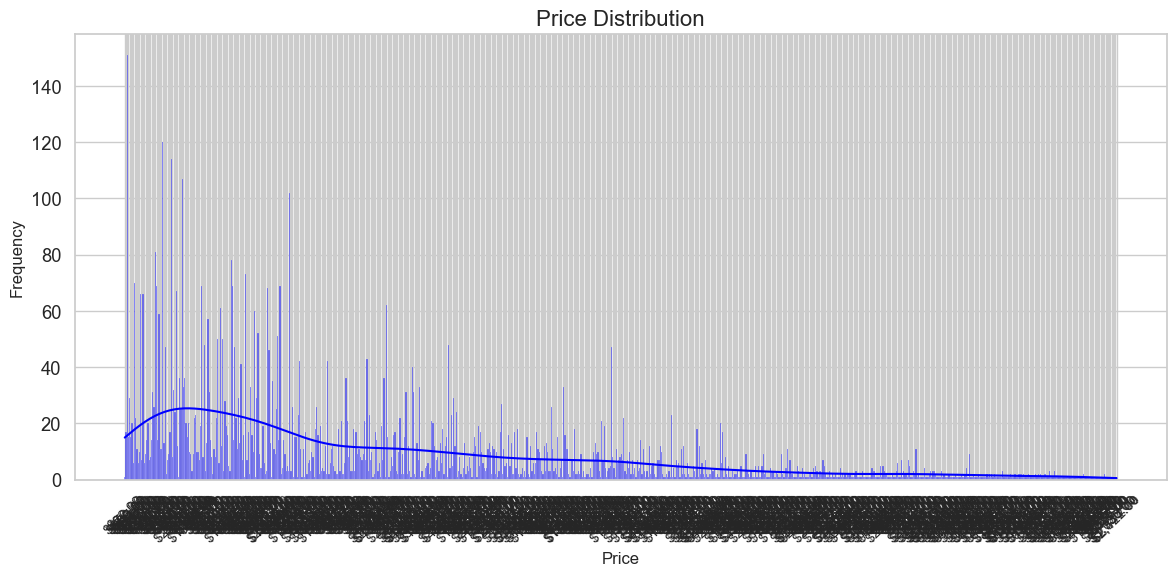

In [32]:
# Distribution of Target Variable (Price)
plt.figure(figsize=(12, 6))
sns.histplot(df_train['price'], bins=50, kde=True, color='blue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add x-axis ticks for better readability
plt.xticks(fontsize=10, rotation=45)

# Tighten layout to avoid overlaps
plt.tight_layout()
plt.show() 

In [35]:

from matplotlib.ticker import MaxNLocator

# Group price into bins for better readability
bin_width = 50
max_price = df_train['price'].max()
bins = np.arange(0, max_price + bin_width, bin_width)

plt.figure(figsize=(12, 6))
sns.histplot(df_train['price'], bins=bins, kde=True, color='blue', edgecolor='black')

# Title and labels
plt.title('Price Distribution (Binned)', fontsize=16)
plt.xlabel('Price Ranges (Binned)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust x-axis ticks to show fewer labels
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))  # Show up to 10 ticks
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

TypeError: cannot convert the series to <class 'float'>